# Example Profiling in Jupyter Notebook  

## Overview  
Example of using a Jupyter notebook (iPython) to investigate some Edmonton open data  

![Edmonton Open Data](images/Property-Assessment-Data.jpg)

### Setup

The next few cells are where common imports and cell magics are done

In [1]:
%matplotlib inline

In [2]:
import requests
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [4]:
import qgrid # Best practices is to put imports at the top of the Notebook.
qgrid.nbinstall(overwrite=True)

In [5]:
#check qgrid
#qgrid.nbinstall?
#qgrid.show_grid?

### Begin
Download a copy of the file.  

Ideally, there is a directory that maps to the Edmonton OpenData catalog *meta data* to help with automation.    

Dataset_Name|Dataset_WebURLID|Dataset_DataID  
------------|----------------|--------------   
Property-Assessment-Data|q7d6-ambg|3pdp-qp95  



In [6]:
csv_url = "https://data.edmonton.ca/resource/3pdp-qp95.csv"
with open('./data/3pdp-qp95.csv', 'wb') as my_csv:
    my_csv.write(requests.get(csv_url).content)    

In [7]:
dframe = pd.read_csv("./data/3pdp-qp95.csv")

In [8]:
dframe.head()

,account_number,garage,house_number,latitude,longitude,neighbourhood,street_name,suite,tax_class,total_asmt
0,10700507,N,2216.0,53.421015,-113.596138,GLENRIDDING AREA,GLENRIDDING BOULEVARD SW,NaN,Other Residential,132000
1,10763784,N,6220.0,53.411479,-113.435444,WALKER,25 AVENUE SW,NaN,Non Residential,320500
2,10712788,N,1296.0,53.414730,-113.429455,WALKER,WATT DRIVE SW,NaN,Non Residential,227000
3,9063801,Y,10624.0,53.550893,-113.434757,CAPILANO,69 STREET NW,NaN,Residential,416000
4,3882925,N,934.0,53.442618,-113.544173,WHITEMUD CREEK RAVINE TWIN BROOKS,127 STREET NW,NaN,Residential,1184500


In [9]:
Nhoods = sorted(dframe.neighbourhood.unique())
# Nhoods

In [10]:
dframe.describe()

,account_number,house_number,latitude,longitude,suite,total_asmt
count,1.000000e+03,955.000000,1000.000000,1000.000000,231.000000,1.000000e+03
mean,9.778789e+06,8750.086911,53.516646,-113.573526,280.398268,3.997245e+05
std,2.394291e+06,6582.845240,0.072014,0.097406,286.662241,1.386681e+06
min,1.067222e+06,51.000000,53.396146,-113.707381,1.000000,0.000000e+00
25%,1.015433e+07,2361.000000,53.483064,-113.679640,115.000000,1.100000e+05
50%,1.079741e+07,8019.000000,53.521396,-113.549191,222.000000,1.402500e+05
75%,1.083848e+07,12809.500000,53.585596,-113.496558,335.500000,2.706250e+05
max,1.084211e+07,22428.000000,53.662398,-113.345071,2634.000000,1.840350e+07


In [11]:
dframe.shape

(1000, 10)

In [12]:
dframe.dtypes

account_number      int64
garage             object
house_number      float64
latitude          float64
longitude         float64
neighbourhood      object
street_name        object
suite             float64
tax_class          object
total_asmt          int64
dtype: object

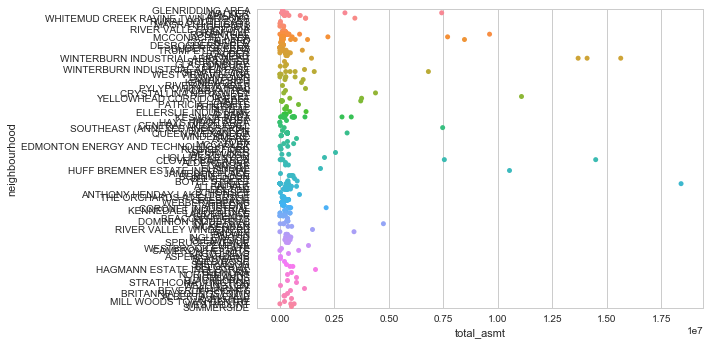

In [13]:
sns.stripplot(x="total_asmt", y="neighbourhood", data=dframe);

In [28]:
#qgrid.show_grid(dframe[['neighbourhood', 'street_name', 'tax_class', 'garage', 'total_asmt']], remote_js=True)
qgrid.show_grid(dframe)

### Create table in sqlite database

In [11]:
%load_ext sql

In [12]:
%reload_ext sql

In [13]:
%config SqlMagic.autopandas=True
import sqlite3

In [14]:
assessments = dframe.copy()

In [15]:
%%sql sqlite://
PERSIST assessments

'Persisted assessments'

In [16]:
%%sql
SELECT 1 AS one

Done.


,one
0,1


In [17]:
%%sql sqlite://
SELECT neighbourhood, COUNT(*)
FROM assessments 
WHERE 1=1 AND total_asmt > 500000
GROUP BY neighbourhood

Done.


,neighbourhood,COUNT(*)
0,ALLARD,3
1,ALLENDALE,3
2,AMBLESIDE,1
3,ANTHONY HENDAY LAKE DISTRICT,1
4,ARGYLL,1
5,BELVEDERE,1
6,BONNIE DOON,4
7,BOYLE STREET,1
8,CAMERON HEIGHTS,1
9,CLOVER BAR AREA,5


In [18]:
dbtest = %sql SELECT * FROM assessments WHERE 1=1 AND total_asmt > 500000

Done.


In [19]:
dbtest[['neighbourhood', 'street_name', 'total_asmt']].head()

,neighbourhood,street_name,total_asmt
0,WHITEMUD CREEK RAVINE TWIN BROOKS,127 STREET NW,1184500
1,WHITEMUD CREEK RAVINE TWIN BROOKS,23 AVENUE NW,1172500
2,WHITEMUD CREEK RAVINE TWIN BROOKS,MACTAGGART DRIVE NW,3440000
3,DESROCHERS AREA,127 STREET SW,22136500
4,WINTERBURN INDUSTRIAL AREA WEST,WINTERBURN ROAD NW,14092500
